<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Jeanne Barthélemy 
<b> Student 2:</b> NONE
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

#o1_1 = # Output of the green neuron
#o1_2 = # Output of the red neuron
#o2_1 = # Output of the black neuron

o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + w1_01)
o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + w1_02)
o2_1 = sigmoid(w2_01 + w2_11*o1_1 + w2_21*o1_2)

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*(o2_1-y)*dsigmoid(o2_1)
dL_w2_11 = 2*(o2_1-y)*o1_1*dsigmoid(o2_1)
dL_w2_21 = 2*(o2_1-y)*o1_2*dsigmoid(o2_1)

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*1
dL_w1_11 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*x1
dL_w1_21 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*x2
dL_w1_02 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*1
dL_w1_12 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*x1
dL_w1_22 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + w1_01)
o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + w1_02)
o2_1 = sigmoid(w2_01 + w2_11*o1_1 + w2_21*o1_2)

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095778
=== BACKWARD PASS ===
w1_01 = 0.25004256068298264
w1_11 = 0.3400340485463861
w1_21 = 0.8100085121365965
w1_02 = -0.43603851076351924
w1_12 = -0.5288308086108153
w1_22 = 0.19279229784729618
w2_01 = 0.13038926097007636
w2_11 = -0.8386415045034469
w2_21 = 0.28222491805663596
=== FORWARD PASS 2 ===
o = 0.4156273914082555


In [3]:
#I added this cell to check if my implementation in the previous cell was correct.
#Let's iterate 20 times the backpropagation algorithm
lr = 1 #a different learning rate
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

for i in range(20):

    o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + w1_01)
    o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + w1_02)
    o2_1 = sigmoid(w2_01 + w2_11*o1_1 + w2_21*o1_2)

    print("=== FORWARD PASS at update " +str(i)+" ===")
    print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
    dL_w2_01 = 2*(o2_1-y)*dsigmoid(o2_1)
    dL_w2_11 = 2*(o2_1-y)*o1_1*dsigmoid(o2_1)
    dL_w2_21 = 2*(o2_1-y)*o1_2*dsigmoid(o2_1)

# Partial derivatives of the loss wrt weights of the first layer
    dL_w1_01 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*1
    dL_w1_11 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*x1
    dL_w1_21 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_11*dsigmoid(o1_1)*x2
    dL_w1_02 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*1
    dL_w1_12 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*x1
    dL_w1_22 = 2*(o2_1-y)*dsigmoid(o2_1)*w2_21*dsigmoid(o1_2)*x2

# Weights updates
    w1_01 -= lr*dL_w1_01
    w1_11 -= lr*dL_w1_11
    w1_21 -= lr*dL_w1_21
    w1_02 -= lr*dL_w1_02
    w1_12 -= lr*dL_w1_12
    w1_22 -= lr*dL_w1_22
    w2_01 -= lr*dL_w2_01
    w2_11 -= lr*dL_w2_11
    w2_21 -= lr*dL_w2_21

print("=== FINAL WEIGHTS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)



=== FORWARD PASS at update 0 ===
o = 0.5597295991095778
=== FORWARD PASS at update 1 ===
o = 0.5310469369943621
=== FORWARD PASS at update 2 ===
o = 0.5070708419881751
=== FORWARD PASS at update 3 ===
o = 0.4872562435658264
=== FORWARD PASS at update 4 ===
o = 0.4710014506864616
=== FORWARD PASS at update 5 ===
o = 0.45772814488664487
=== FORWARD PASS at update 6 ===
o = 0.44691902910880593
=== FORWARD PASS at update 7 ===
o = 0.4381299921613152
=== FORWARD PASS at update 8 ===
o = 0.430988912449175
=== FORWARD PASS at update 9 ===
o = 0.4251884892887539
=== FORWARD PASS at update 10 ===
o = 0.4204771288140157
=== FORWARD PASS at update 11 ===
o = 0.4166498669079589
=== FORWARD PASS at update 12 ===
o = 0.413540180868352
=== FORWARD PASS at update 13 ===
o = 0.41101296177893815
=== FORWARD PASS at update 14 ===
o = 0.40895864571184315
=== FORWARD PASS at update 15 ===
o = 0.4072883879152785
=== FORWARD PASS at update 16 ===
o = 0.4059301290769937
=== FORWARD PASS at update 17 ===
o = 0

    My algorithm seems correct, it converges for different values of y.

<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [4]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        #u_1 = # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        #self.o_hidden[:, :-1] = # Compute output of hidden layer
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden)
        #u_2 = # Compute activations for the output layer        
        u_2 = np.dot( self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        #self.o_output = # Compute output of output layer
        self.o_output = transfer_f(self.u_output)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [5]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [6]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0 , print_ = False):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        #self.dL_du_output = # Compute partial derivative of loss with respect to activations of output layer
        #self.dL_du_hidden = # Compute partial derivative of loss with respect to activations of hidden layer

        self.dL_du_output =2*(self.o_output - targets)
     
            
        self.dL_du_hidden = np.dot(self.dL_du_output*self.transfer_df(self.u_output), self.W_hidden_to_output[0:len(self.W_hidden_to_output)-1].T)
         
        if print_ :
            print( self.dL_du_hidden.shape)
            print(self.dL_du_output.shape)
            print(np.dot(self.dL_du_output*self.transfer_df(self.u_output), self.W_hidden_to_output.T).shape)
            print(self.W_hidden_to_output.shape)
            print(self.transfer_df(self.u_output).shape)
            
            print(self.transfer_df(self.u_hidden).shape)
            print(self.input.shape)
            print(self.W_input_to_hidden.shape )
            print("***")
            
            
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden = np.dot((self.dL_du_hidden*self.transfer_df(self.u_hidden)).T, self.input).T
       
        dW_hidden_to_output =  np.dot((self.dL_du_output*self.transfer_df(self.u_output)).T, self.o_hidden).T
       

        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [7]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


In [8]:
#Tests if my implementation really works
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)
test = [[0.8, 0.2]]
targets = [[0.4]]

for i in range(10):
# Feed test values
    model.feedforward(test)

# Backpropagate  
    model.backpropagate(targets)

# Feed test values again
    model.feedforward(test)

# Print the output
    print("Output =", model.o_output)

Output = [[0.40648824]]
Output = [[0.40044349]]
Output = [[0.40003293]]
Output = [[0.40000246]]
Output = [[0.40000018]]
Output = [[0.40000001]]
Output = [[0.4]]
Output = [[0.4]]
Output = [[0.4]]
Output = [[0.4]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [9]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


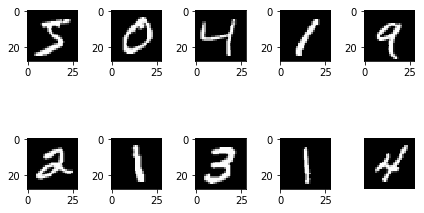

In [10]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [11]:
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 20.60608744621277


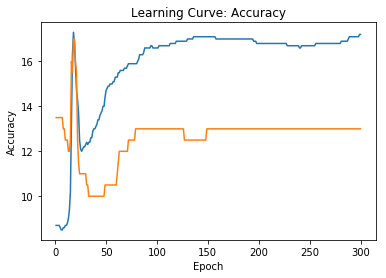

Training time: 20.784175395965576


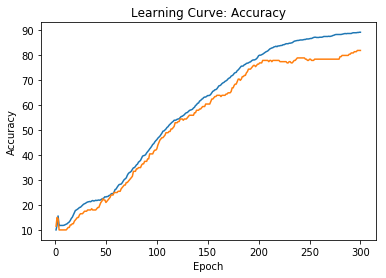

Training time: 20.75205707550049


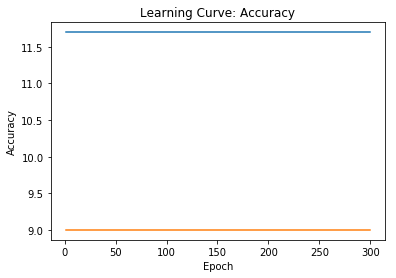

1028

In [12]:
# Train NN and print accuracy on test data
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)

    -----REMARKS--------
    30 neurons in hidden layer not to much bias, neither too much variance. Seems to be a good number of neurons.
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not possible

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 19.92365574836731


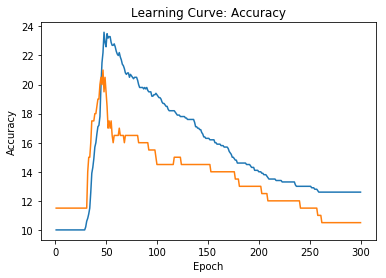

Training time: 19.935461044311523


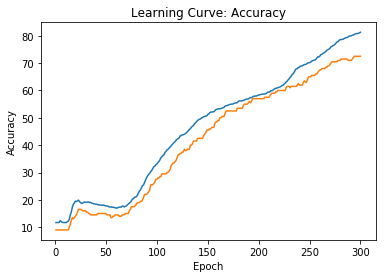

Training time: 19.893913984298706


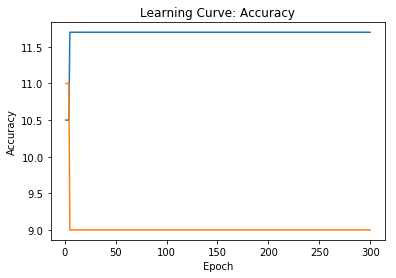

Training time: 23.515969276428223


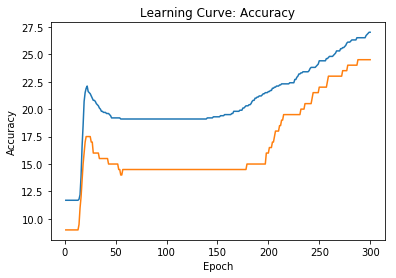

Training time: 23.73059320449829


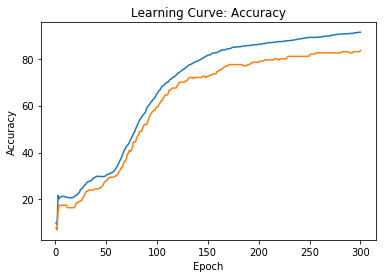

Training time: 23.52612280845642


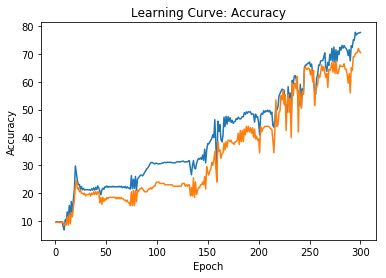

7130

In [13]:
# Define your neural network
# 15 hidden neurons 
mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)

# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)

    -----REMARKS--------
    15 neurons: very small number of neurons, prone to underfitting.
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not possible
    
    75 neurons: bigger number of neurons, prone to overfitting. 
    It is still a small number of neurons,relatively to the size of the input. 
    Therefore, even if this model is the most prone to overfitting among the three, 
    it might still not be that much overfitting. 
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not smooth.

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 2.817368984222412


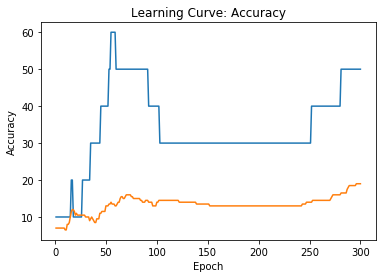

Training time: 2.8054311275482178


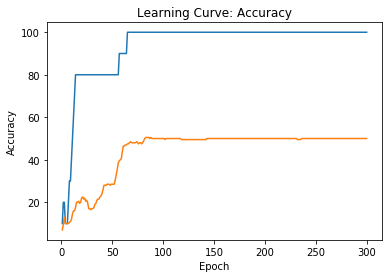

Training time: 2.794081926345825


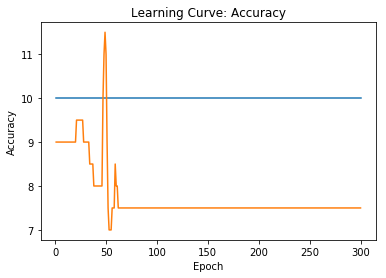

Training time: 2.6165099143981934


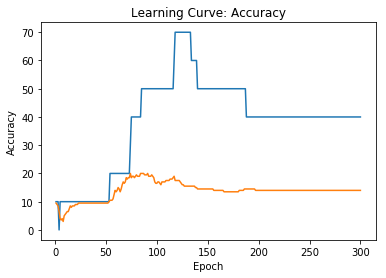

Training time: 2.6314308643341064


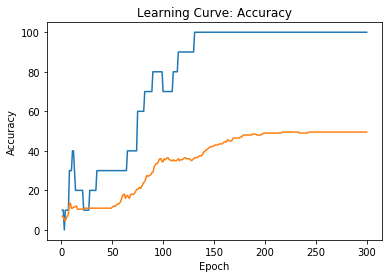

Training time: 2.618703603744507


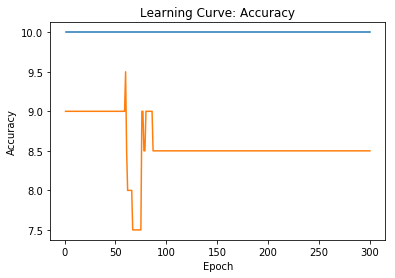

Training time: 3.369185209274292


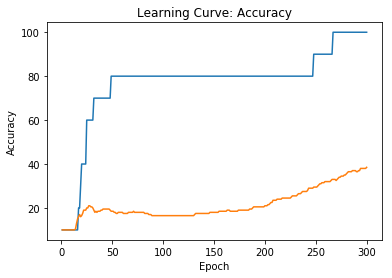

Training time: 3.3874921798706055


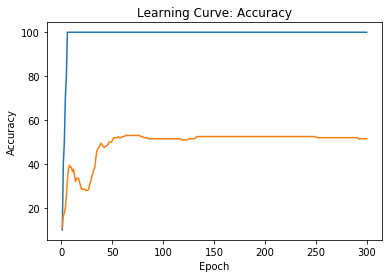

Training time: 3.4330825805664062


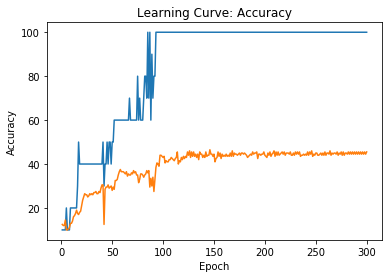

4080

In [14]:
# Train NN and print accuracy on test data
# 30 hidden neurons
mnist_model = NeuralNetwork(784,30,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)

# 15 hidden neurons
mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)


# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)
mnist_model.predict(test_data)
# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)
# Learning rate 10.
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)
mnist_model.predict(test_data)


    -----REMARKS--------
    In this case, the training set is far too small, therefore we often get 100% training set accuracy,
    but a very bad validation set accuracy.
    We have overfitting, especially in the case of 75 neurons.
    
    30 neurons: less overfitting than 75 neurons, less underfitting than 15 neurons.
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not possible
    
    
    15 neurons: very small number of neurons, prone to underfitting.
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not possible
    
    75 neurons: bigger number of neurons, prone to overfitting. 
    It is still a small number of neurons,relatively to the size of the input. 
    Therefore, even if this model is the most prone to overfitting among the three, 
    it might still not be that much overfitting. 
    lr = 0.1 : too slow to learn, lr is too small
    lr = 1 : good learning, very good validation set accuracy, lr is convenient
    lr = 10 : lr is too big, there is divergence, the learning is not smooth.

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer: I wrote remarks under each cell output (trying to explain the results)

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

    Answer: It seems that 1 is the best learning rate, and that the adequate number of neurons is not 15 (underfitting).
    However, 30 seems to be a wise choice in order to prevent overfitting. But, as the size of the input is far larger 
    than 75, we cannot tell for sure with our current graphs that the model with 75 neurons will necessarly overfit.
    I will therefore try the model with lr=1 and 75 neurons, but the model with lr = 1 and 30 neurons might be a better choice.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1663.5001559257507


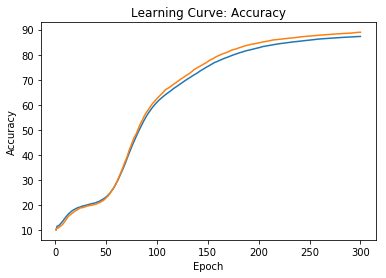

8834

In [14]:
mnist_model = mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
mnist_model.weights_init()
mnist_model.train(training_data, validation_data, iterations=300, learning_rate=1)
mnist_model.predict(test_data)

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = -t_i + t_i\times o_i $

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [87]:
import time
import numpy as np
from utils import *
from transfer_functions import *


class NeuralNetwork(NeuralNetwork):
     def feedforward_xe_(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        #u_1 = # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        #self.o_hidden[:, :-1] = # Compute output of hidden layer
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden)
        #u_2 = # Compute activations for the output layer        
        u_2 = np.dot( self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        #self.o_output = # Compute output of output layer
        self.o_output = softmax(self.u_output)

     def backpropagate_xe_(self, targets, learning_rate=5.0, print_ = False):  #to change
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        #self.dL_du_output = # Compute partial derivative of loss with respect to activations of output layer
        #self.dL_du_hidden = # Compute partial derivative of loss with respect to activations of hidden layer

        self.dL_du_output =-targets/self.o_output
     
            
         #self.dL_du_hidden = np.dot(self.dL_du_output*self.transfer_df(self.u_output), self.W_hidden_to_output[0:len(self.W_hidden_to_output)-1].T)
       # self.dL_du_hidden = np.dot((self.o_output - targets*self.u_output),self.W_hidden_to_output[0:len(self.W_hidden_to_output)-1].T)
       #the one above corresponds to the formula above
        self.dL_du_hidden = np.dot((targets*self.o_output-targets),self.W_hidden_to_output[0:len(self.W_hidden_to_output)-1].T)
        #self.dL_du_hidden = np.dot((-targets*d_softmax(self.u_output)/self.o_output),self.W_hidden_to_output[0:len(self.W_hidden_to_output)-1].T)
         
            
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden = np.dot((self.dL_du_hidden*self.transfer_df(self.u_hidden)).T, self.input).T
       
        #dW_hidden_to_output =  np.dot((self.dL_du_output*self.transfer_df(self.u_output)).T, self.o_hidden).T
        dW_hidden_to_output =  np.dot((self.dL_du_output*d_softmax(self.u_output)).T, self.o_hidden).T

        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)
        
        if (print_):
            #print(d_softmax(self.u_output).shape)
            #print(self.dL_du_output.shape)
            #print(targets)
            #print(self.o_output)
            #print(self.dL_du_output)
            print(self.W_hidden_to_output[2])
            print("***")
            print(self.W_input_to_hidden[2])
           # print("***")
           # print(dW_hidden_to_output[2])
           # print("---")
           # print((l*dW_hidden_to_output/len(targets))[2])
            print("-----------------")
    

        
     def predict_xe_(self, test_data):
        """ Evaluate performance by counting how many examples in test_data are correctly 
            evaluated. """
        self.feedforward_xe_(test_data[0])
        answer = np.argmax(test_data[1], axis=1)
        prediction = np.argmax(self.o_output, axis=1)
        count = len(test_data[0]) - np.count_nonzero(answer - prediction)
        return count 
    
     def train_xe_(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        xes = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict_xe_(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        for it in range(iterations):
            self.feedforward_xe_(inputs)
            self.backpropagate_xe_(targets, learning_rate=learning_rate)
            xe = targets*np.log(self.o_output)*(-1)
            error = targets - self.o_output
            error *= error
            training_accuracies.append(100*self.predict_xe_(data)/len(data[0]))
            validation_accuracies.append(100*self.predict_xe_(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
                print("    - X-Entropy:", np.sum(xe)/len(targets))
        print("Training time:", time.time()-start_time)
        self.W_input_to_hidden = best_i2h_W
        self.W_hidden_to_output = best_h2o_W
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")


In [88]:
def d_softmax(x): #derivative
   # K = np.tile(np.reshape(np.sum(np.exp(x), axis=1), [x.shape[0], 1]), [1, x.shape[1]])
   # return np.exp(x)*(np.exp(x)-K)/(K**2)
    K = np.sum(np.exp(x), axis = 1).reshape((x.shape[0],1))
    dev = (np.exp(x)*K-np.exp(2*x))/(K**2)
    #dev = np.clip(dev, 1e-7, 1 ) 
   # print(x[0])
   # print("***")
   # print(dev[0])
   # print("---------------")
    return dev

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 1.0012080669403076


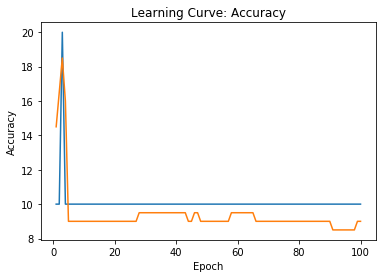

In [92]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784,30,10)
# Learning rate 0.1
mnist_model_xe.weights_init()
mnist_model_xe.train_xe_(vsmall_training_data, small_validation_data, iterations=100, learning_rate=1)

# Train NN and print accuracy on validation data

In [39]:
# Print accuracy on test data
mnist_model_xe.predict_xe_(test_data)

1028

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>